In [83]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

import torchvision.transforms.functional as F

plt.rcParams['savefig.bbox'] = 'tight'  # 保存图片时布局紧凑


def show_image(images, title=None):
    """
    显示图片
    """
    if not isinstance(images, list):
        images = [images]
    # figure 表示整个图形，axes 表示包含每个子图坐标轴的数组，squeeze=False 表示始终返回一个二维数组
    figure, axes = plt.subplots(ncols=len(images), squeeze=False)

    # 显示图片
    for i, _image in enumerate(images):
        _image = _image.detach()
        _image = F.to_pil_image(_image)
        axes[0, i].imshow(np.asarray(_image))
        axes[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    # 设置标题
    if title:
        figure.suptitle(title)

torch.rand 是均匀分布，torch.randn 是正态分布。

In [106]:
# 输入
image = torch.randn(3, 256, 256)
color = torch.tensor([1, 1, 1]).reshape(3, 1, 1)

# 在图像的特定位置填充颜色
image[:, 100:150, 100:150] = color.repeat(1, 50, 50)

# show_image(image)

mask = torch.eq(image, color).all(dim=0).float()

# 输出
# show_image(mask)
print(mask.shape)
print(np.multiply([0, 1, 2], 3))

a = torch.tensor([1, 2, 3])
b = a
b = b.reshape(3, 1, 1)
print(a)
print(b)

torch.Size([256, 256])
[0 3 6]
tensor([1, 2, 3]) tensor([[[1]],

        [[2]],

        [[3]]])


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'figure.dpi':150})

# colormaps 中可用的颜色，将颜色图分类:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

viridis = matplotlib.colormaps.get_cmap('viridis')

size = 11
bounds = np.linspace(0, 1, size)
colors = viridis(bounds)

fig, axes = plt.subplots(figsize=(size, 1))
fig.subplots_adjust(bottom=0)
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb1 = mpl.colorbar.ColorbarBase(axes, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label('Colorbar')

plt.show()

# 输出 viridis 的颜色码
colors_byte = [[int(c[0] * 255), int(c[1] * 255), int(c[2] * 255)] for c in colors]
colors_code = ['#{:02x}{:02x}{:02x}'.format(c[0], c[1], c[2]) for c in colors_byte]
print(colors_code)

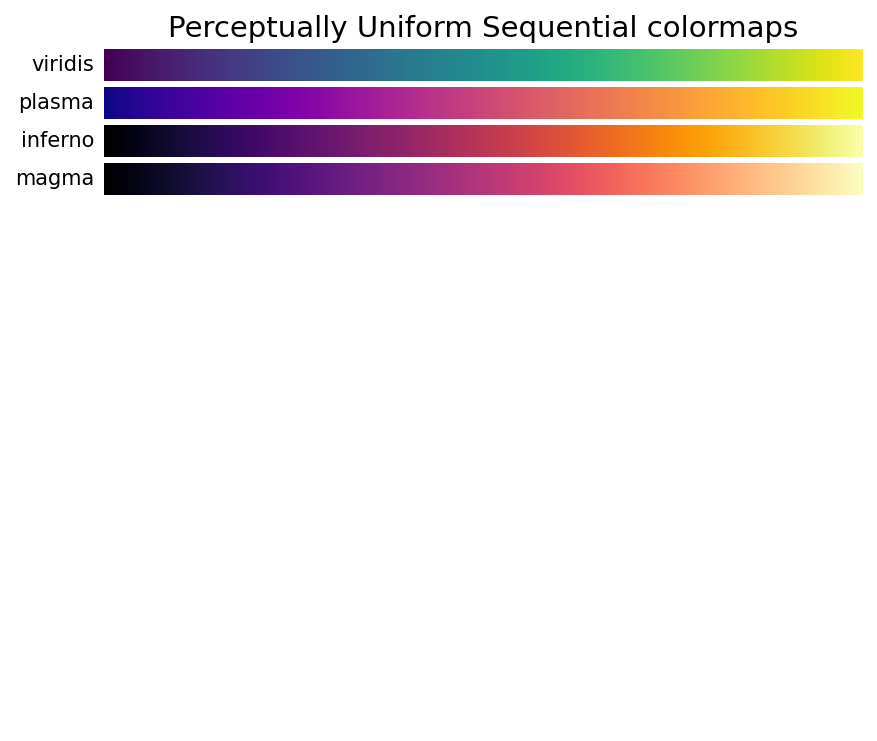

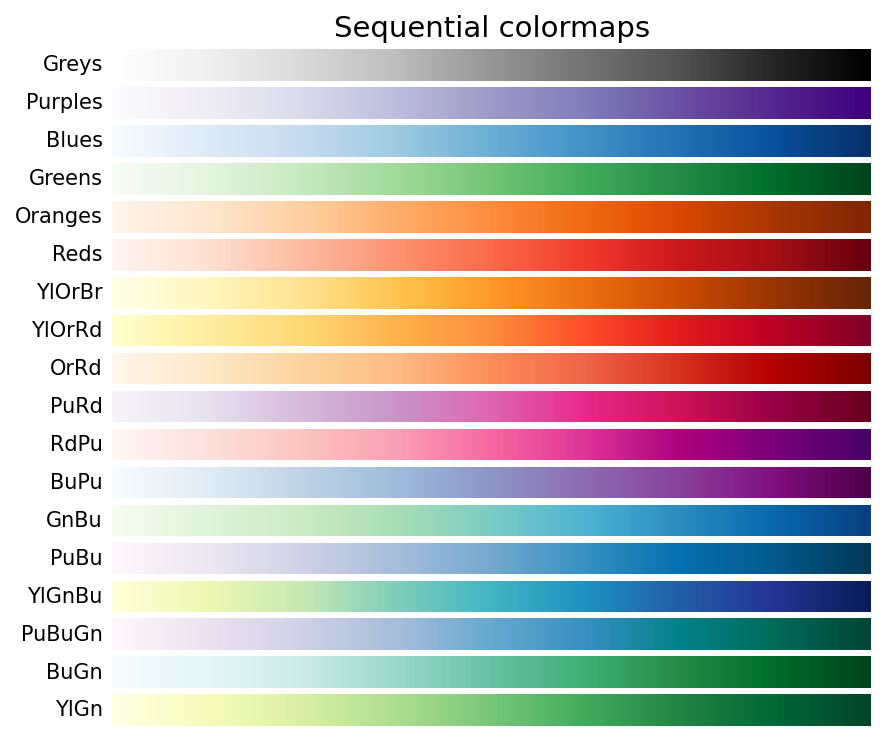

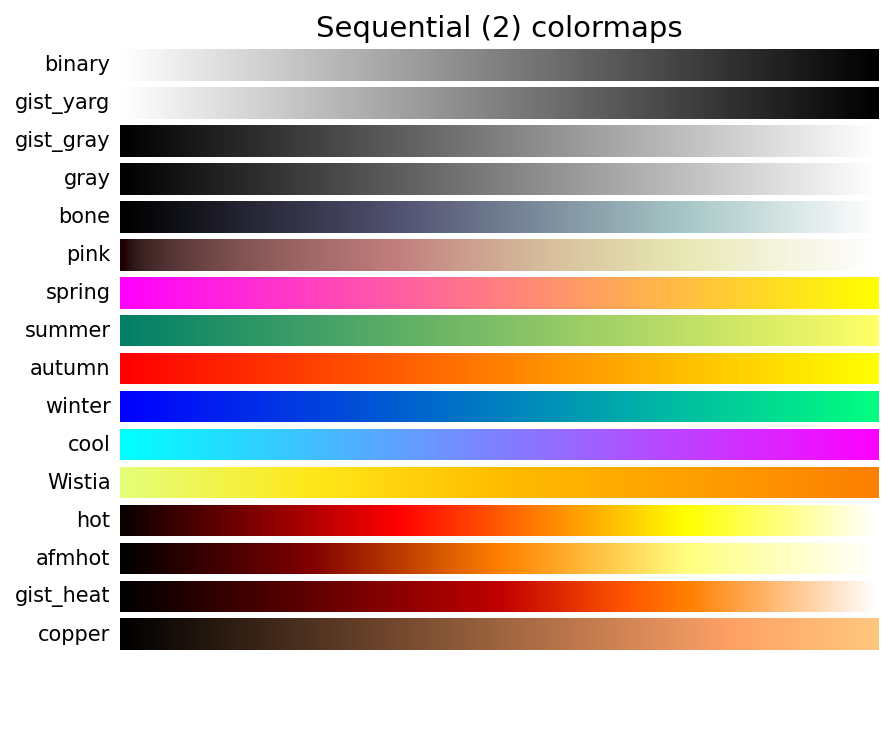

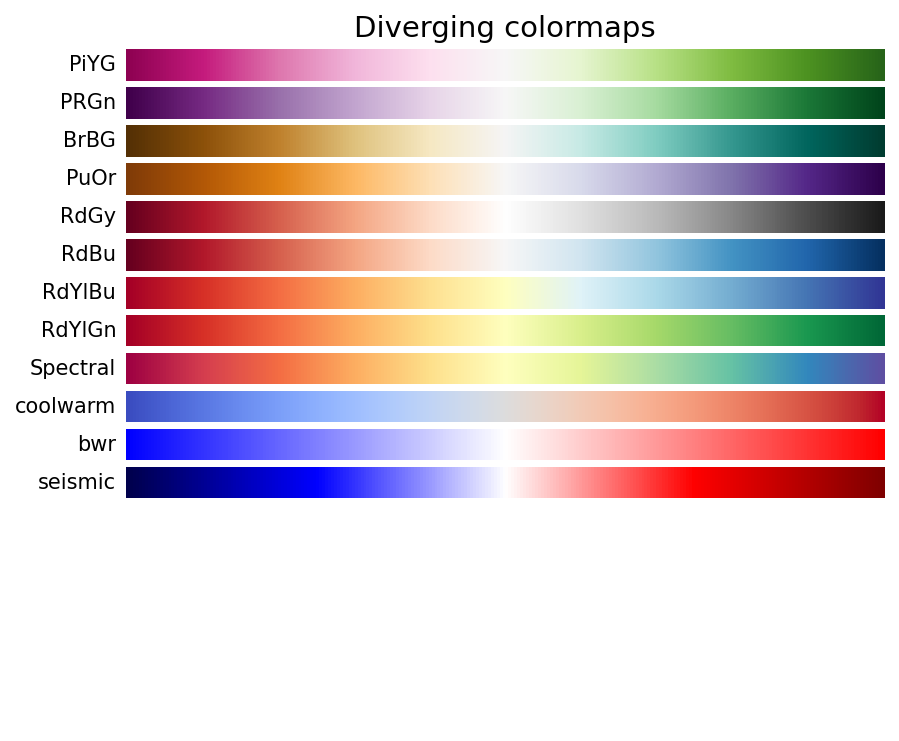

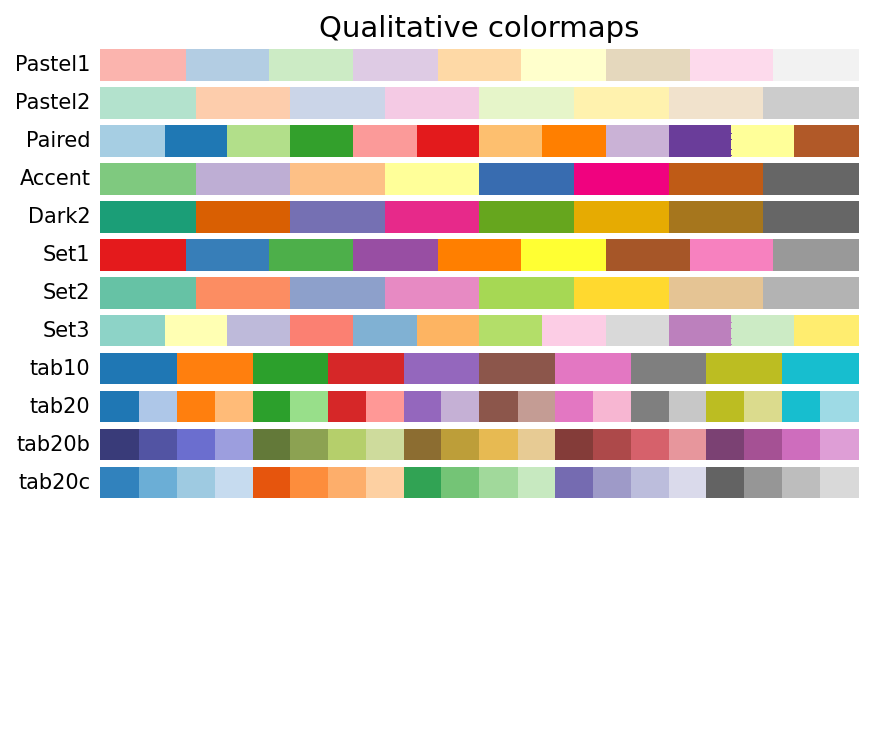

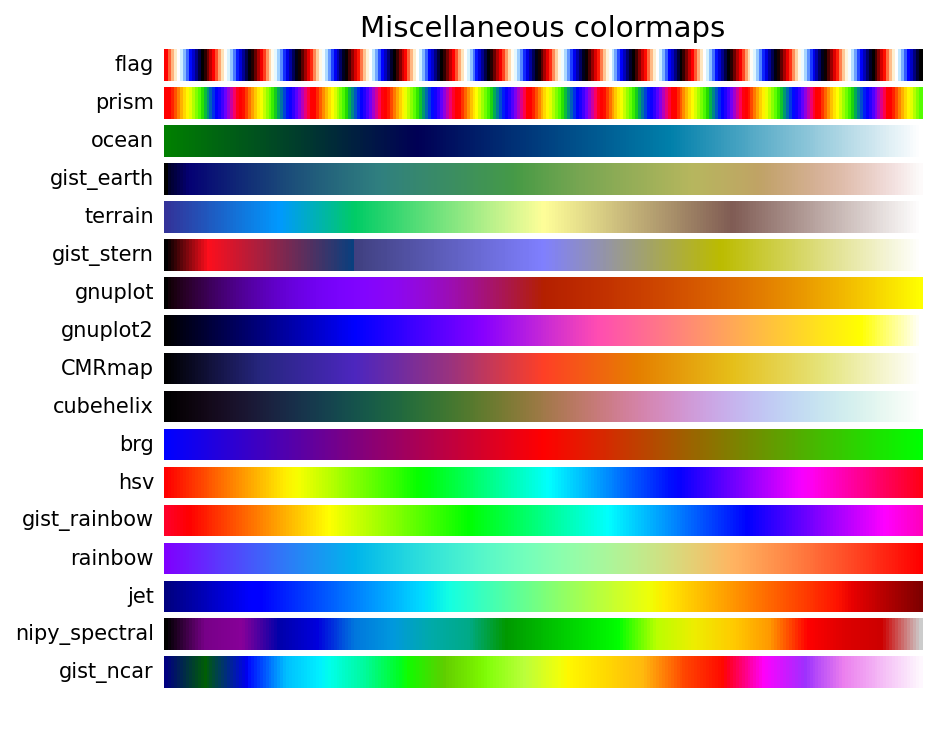

In [85]:
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()